In [4]:
import os,codecs
import numpy as np

path='/Users/samhithraj/Desktop/emnist_byclass_dataset/'
files=os.listdir(path)

def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)

data_dict={}
for file in files:
    print("Reading ",file)
    with open (path+file,'rb') as f:
        data = f.read()
        type = get_int(data[:4])   
        length = get_int(data[4:8])
        if (type == 2051):
            category = 'images'
            num_rows = get_int(data[8:12])  
            num_cols = get_int(data[12:16])
            parsed = np.frombuffer(data,dtype = np.uint8, offset = 16)
            parsed = parsed.reshape(length,num_rows,num_cols)  
        elif(type == 2049):
            category = 'labels'
            parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
            parsed = parsed.reshape(length)                          
        if (length==116323):
            set = 'test'
        elif (length==697932):
            set = 'train'
        data_dict[set+'_'+category] = parsed

Reading  emnist-byclass-test-labels-idx1-ubyte
Reading  emnist-byclass-test-images-idx3-ubyte
Reading  emnist-byclass-train-images-idx3-ubyte
Reading  emnist-byclass-train-labels-idx1-ubyte


In [5]:
data_dict.keys()

dict_keys(['test_labels', 'test_images', 'train_images', 'train_labels'])

In [34]:
x_train=data_dict['train_images']
y_train=data_dict['train_labels']
x_test=data_dict['test_images']
y_test=data_dict['test_labels']

label:  7


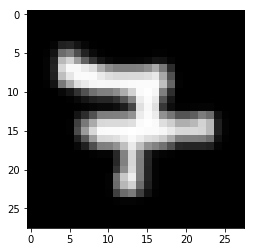

7


In [60]:
labels = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
import matplotlib.pyplot as plt
plt.gray() 
img_index=44444
imgplot = plt.imshow(x_test[img_index].reshape(28, 28).T, cmap='gray')
print("label: ",y_test[img_index])
plt.show()
print(labels[y_test[img_index]])

In [43]:
print(x_train.shape,x_test.shape)

(697932, 28, 28) (116323, 28, 28)


In [44]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [45]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [46]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (697932, 28, 28, 1)


In [47]:
import tensorflow as tf

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [50]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(62,activation=tf.nn.softmax))

In [64]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3, batch_size=1000)

Epoch 1/3
697932/697932 [==============================] - 481s 689us/step - loss: 0.5408 - acc: 0.8197
Epoch 2/3
697932/697932 [==============================] - 431s 618us/step - loss: 0.4964 - acc: 0.8306
Epoch 3/3
697932/697932 [==============================] - 367s 526us/step - loss: 0.4710 - acc: 0.8376


In [65]:
model.evaluate(x_test, y_test)

116323/116323 [==============================] - 29s 249us/step


[0.42430577772132805, 0.8506314314457124]

40
e


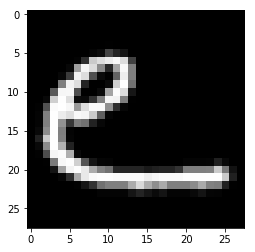

In [164]:
image_index = 12564
plt.imshow(x_test[image_index].reshape(28, 28).T,cmap='gray')
pred = model.predict(x_test[image_index].reshape(1,28,28, 1))
print(pred.argmax())
print(labels[int(pred.argmax())])

In [96]:
p=model.predict(x_test)

In [97]:
print(p)

[[9.8641010e-07 6.6753852e-01 7.0647011e-06 ... 2.4989793e-06
  9.4094205e-05 6.1642751e-08]
 [5.8309357e-05 7.0574369e-09 2.2079982e-03 ... 2.9013303e-10
  6.9950634e-10 7.7580786e-08]
 [5.4779315e-01 1.4887924e-07 4.3758235e-04 ... 8.0945239e-10
  5.2234626e-08 4.6191150e-08]
 ...
 [2.0773486e-10 3.9282444e-10 1.4627848e-05 ... 2.0641933e-09
  7.1189374e-11 2.7086091e-06]
 [3.7408805e-01 1.7935445e-08 4.6783280e-06 ... 5.0821942e-09
  1.8790136e-07 4.2805773e-08]
 [5.9457057e-11 2.1071893e-09 3.5869711e-14 ... 1.1661662e-10
  1.1713989e-09 1.2812062e-13]]


In [100]:
c=0
for i in range(x_test.shape[0]):
    c+=1 if np.argmax(p[i])==y_test[i] else 0
print(c)    
print((c/x_test.shape[0])*100) 

98948
85.06314314452


In [5]:
from keras.models import model_from_json
from keras.models import load_model

Using TensorFlow backend.


In [6]:
datapath= '/Users/samhithraj/Desktop/emnist_byclass_dataset/'

In [7]:
json_file = open(datapath+'model_num.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights(datapath+"model_num.h5")
print("Loaded model from disk")

loaded_model.save('model_num.hdf5')
loaded_model=load_model('model_num.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
